In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('../../../DataSets/Google_Stock_Price_Train.csv')

In [65]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


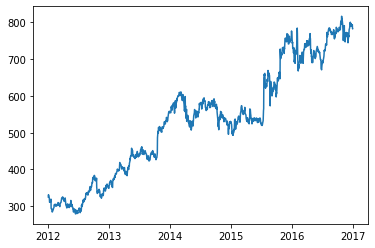

In [66]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

In [67]:
price = df[['Open']]

In [68]:
New_Data = df[['Open','High', 'Low', 'Volume']]
New_Data

,Open,High,Low,Volume
0,325.25,332.83,324.97,"7,380,500"
1,331.27,333.87,329.08,"5,749,400"
2,329.83,330.75,326.89,"6,590,300"
3,328.34,328.77,323.68,"5,405,900"
4,322.04,322.29,309.46,"11,688,800"
...,...,...,...,...
1253,790.90,792.74,787.28,"623,400"
1254,790.68,797.86,787.66,"789,100"
1255,793.70,794.23,783.20,"1,153,800"
1256,783.33,785.93,778.92,"744,300"


In [69]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   object 
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


In [70]:
New_Data['Volume'] = New_Data['Volume'].str.replace(",","").astype(float)

#df.loc[row_indexer,column_indexer] s1.loc['c':] .str.replace(",","").astype(float) s1.iloc[:3] = 0

In [71]:
New_Data

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500.0
1,331.27,333.87,329.08,5749400.0
2,329.83,330.75,326.89,6590300.0
3,328.34,328.77,323.68,5405900.0
4,322.04,322.29,309.46,11688800.0
...,...,...,...,...
1253,790.90,792.74,787.28,623400.0
1254,790.68,797.86,787.66,789100.0
1255,793.70,794.23,783.20,1153800.0
1256,783.33,785.93,778.92,744300.0


In [72]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   float64
dtypes: float64(4)
memory usage: 39.4 KB


In [73]:
price

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
#scaler = MinMaxScaler()
#price_scaled = scaler.fit_transform(price)

In [76]:
scaler = MinMaxScaler()
New_Data_scaled = scaler.fit_transform(New_Data)
New_Data_scaled.shape

(1258, 4)

In [77]:
#price_scaled.shape

In [78]:
New_Data_scaled.shape

(1258, 4)

In [79]:
'''X = []
for i in range(1198):
    row = price_scaled[i:i+61,0]
    X.append(row)
X = np.array(X)
X.shape'''

'X = []\nfor i in range(1198):\n    row = price_scaled[i:i+61,0]\n    X.append(row)\nX = np.array(X)\nX.shape'

In [80]:
X = []
for i in range(1198):
        row = New_Data_scaled[i:i+61,:]
        X.append(row)
X = np.array(X)
X.shape

(1198, 61, 4)

In [81]:
X_train= X[:,:60]
X_train.shape

(1198, 60, 4)

In [82]:
y_train= X[:,60,0]
y_train.shape

(1198,)

In [83]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [84]:
X_train.shape, y_train.shape

((1198, 60, 4), (1198,))

In [85]:
# X_train = X_train.reshape(1198,60,1)
#X_train = X_train.reshape(1198,60,4)

In [86]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [87]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(60, 4)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 33s 276ms/step - loss: 0.0439
Epoch 2/20
38/38 [==============================] - 9s 235ms/step - loss: 0.0146
Epoch 3/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0098
Epoch 4/20
38/38 [==============================] - 9s 238ms/step - loss: 0.0092
Epoch 5/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0064
Epoch 6/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0066
Epoch 7/20
38/38 [==============================] - 9s 249ms/step - loss: 0.0046
Epoch 8/20
38/38 [==============================] - 9s 232ms/step - loss: 0.0054
Epoch 9/20
35/38 [==========================>...] - ETA: 0s - loss: 0.0051

# Model Evaluation

In [ ]:
df_test = pd.read_csv('../../../DataSets/Google_Stock_Price_Test.csv')
df_test.head()

In [ ]:
df_test.shape

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(df_test['Date']),df_test['Open'])

In [ ]:
df[['Open']].iloc[-60:]

In [ ]:
#test_data = pd.concat([df[['Open']].iloc[-60:], df_test[['Open']]])
test_data = pd.concat([df[['Open','High', 'Low', 'Volume']].iloc[-60:], df_test[['Open','High', 'Low', 'Volume']]])

In [ ]:
test_data

In [ ]:
test_data.info()

In [ ]:
test_data['Volume'] = test_data['Volume'].str.replace(",","").astype(float)
test_data

In [ ]:
test_data.shape

In [ ]:
test_scaled = scaler.transform(test_data)

In [ ]:
test_scaled.shape

In [ ]:
X = []
for i in range(20):
        row = test_scaled[i:i+61,:]
        X.append(row)
X = np.array(X)
X.shape

In [ ]:
X_test = X[:,:60]
X_test.shape


In [ ]:
yp = model.predict(X_test)

In [ ]:
yp

In [ ]:
scaler_2 = MinMaxScaler()
scaler_2.fit(df[['Open']])


In [ ]:
yp_unscaled= scaler_2.inverse_transform(yp)

In [ ]:
yp_unscaled

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Open'],)
plt.plot(yp_unscaled)
